In [133]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [134]:
# Load the cleaned sales dataset
data = pd.read_csv("/Users/yangn/Desktop/CIND 820/sales_clean.csv")
data.head(n=10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Department Name          180519 non-null  object 
 1   order date (DateOrders)  180519 non-null  object 
 2   Order Item Total         180519 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.1+ MB


In [135]:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data.set_index('order date (DateOrders)', inplace=True)
data.index

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [136]:
data['Department Name'] = data['Department Name'].astype('category')
data['Department Name'].value_counts()

Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: Department Name, dtype: int64

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180519 entries, 2018-01-31 22:56:00 to 2016-01-15 18:54:00
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Department Name   180519 non-null  category
 1   Order Item Total  180519 non-null  float64 
dtypes: category(1), float64(1)
memory usage: 2.9 MB


In [138]:
#Split file by department name, and taking Fanshop for analysis as it's top sales department
Fanshop = data.loc[data['Department Name'] == 'Fan Shop']
Fanshop = Fanshop.groupby('order date (DateOrders)')['Order Item Total'].sum().reset_index()
Fanshop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41303 entries, 0 to 41302
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order date (DateOrders)  41303 non-null  datetime64[ns]
 1   Order Item Total         41303 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 645.5 KB


In [140]:
Fanshop.set_index('order date (DateOrders)', inplace=True)
y = Fanshop['Order Item Total'].resample('MS').mean()

In [141]:
y['2015':]

order date (DateOrders)
2015-01-01    376.655576
2015-02-01    371.710769
2015-03-01    373.832458
2015-04-01    378.634187
2015-05-01    366.927089
2015-06-01    380.724331
2015-07-01    368.650769
2015-08-01    370.859524
2015-09-01    381.653535
2015-10-01    374.864460
2015-11-01    389.016688
2015-12-01    372.661211
2016-01-01    374.132738
2016-02-01    375.758335
2016-03-01    376.828919
2016-04-01    376.734999
2016-05-01    370.986756
2016-06-01    379.554787
2016-07-01    382.121142
2016-08-01    373.382692
2016-09-01    364.215665
2016-10-01    377.216243
2016-11-01    387.231552
2016-12-01    371.189846
2017-01-01    367.286053
2017-02-01    385.731028
2017-03-01    371.902455
2017-04-01    383.106296
2017-05-01    378.730938
2017-06-01    385.588780
2017-07-01    378.972727
2017-08-01    384.745492
2017-09-01    394.027790
2017-10-01    322.610734
2017-11-01           NaN
2017-12-01     10.367787
2018-01-01     10.371848
Freq: MS, Name: Order Item Total, dtype: float64

In [156]:
y = y.fillna(y.mean())
y = y['2015-01-01':'2017-11-01',]

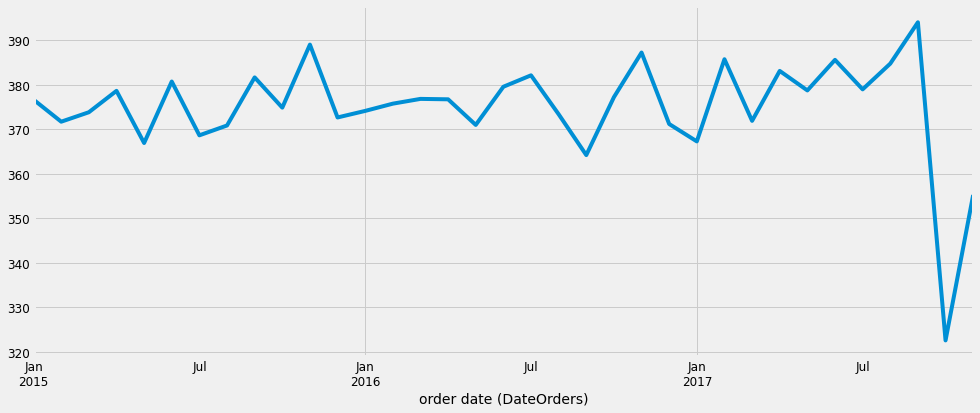

In [157]:
y.plot(figsize=(15, 6))
plt.show()

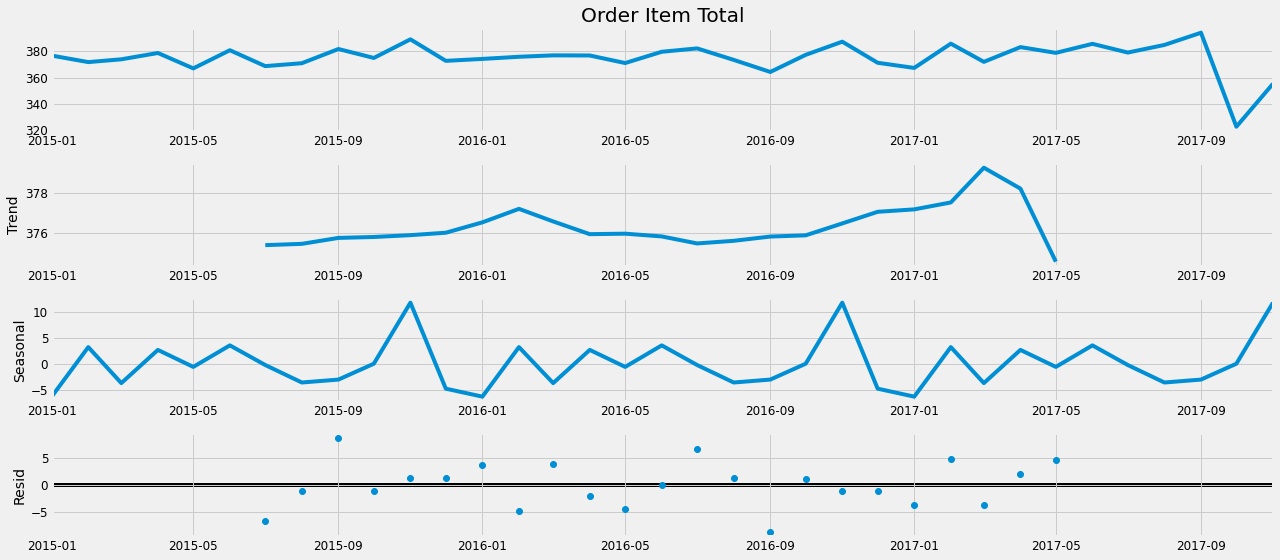

In [158]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [159]:
#ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [165]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:501.53602542263314
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:315.105947151422
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:187.41099351652693
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:94.24418528134518
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:196.6872271507956
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:192.4401243552709
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:102.0665759475823
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:95.91208623967294
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:447.7100272177369
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:277.76085203199165
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:181.74873281481092
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:87.02465172659612
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:198.61937636774468
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:185.94265662699277
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:101.76511187028092
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:86.45155503335312
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:280.76400995778044
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:187.74107861622954
AR

In [172]:
# Above ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:79.26907750761208 which is the lowest AIC, thus it's suggested that we consider this to be optimal option
# Then fit the ARIMA model,enforce_stationarity=False,
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1687      0.933      0.181      0.857      -1.660       1.998
ma.L1         -1.0000    1.1e+04  -9.12e-05      1.000   -2.15e+04    2.15e+04
ar.S.L12      -0.2138      1.014     -0.211      0.833      -2.201       1.773
sigma2       253.3216   2.78e+06   9.12e-05      1.000   -5.44e+06    5.44e+06


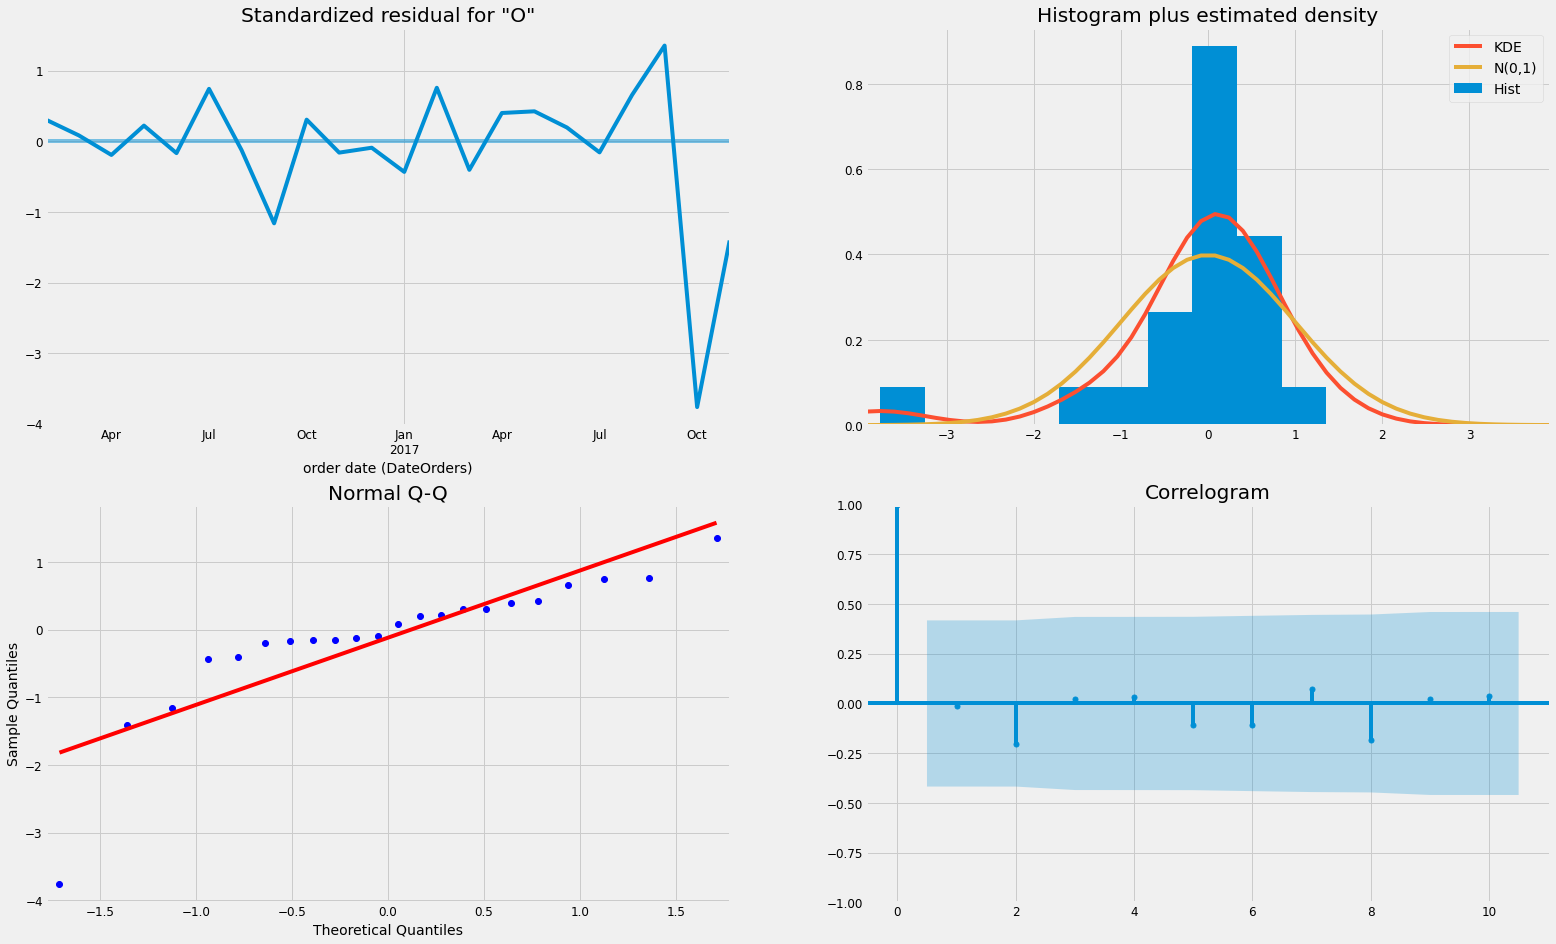

In [181]:
results.plot_diagnostics(figsize=(24,15))
plt.show()

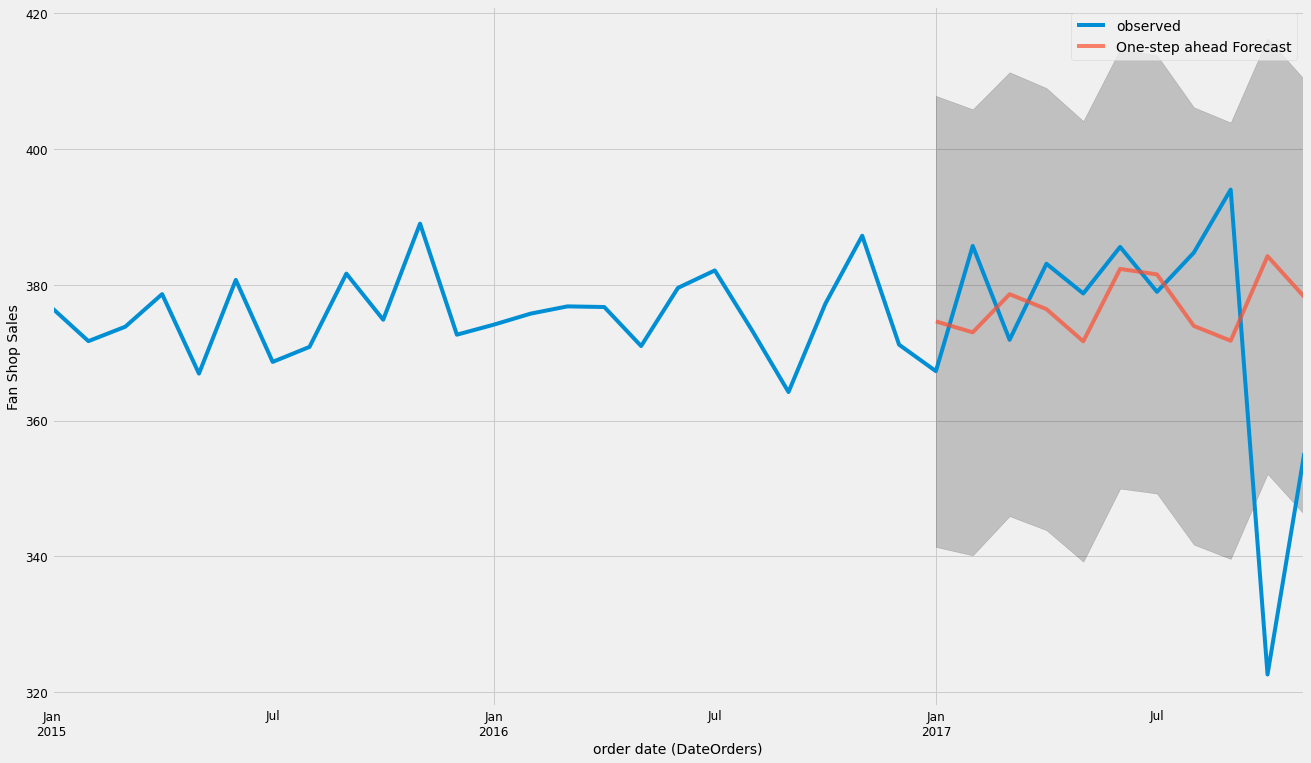

In [182]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(20, 12))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('order date (DateOrders)')
ax.set_ylabel('Fan Shop Sales')
plt.legend()
plt.show()